In [4]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

custom_params = {"axes.spines.right": False, 'grid.color': 'lightgray', 'axes.grid': True, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

from survivors import metrics as metr
from survivors import constants as cnt
from survivors import criteria as crit
import survivors.datasets as ds

import warnings
warnings.filterwarnings("ignore")

In [6]:
X1, y1, features1, categ1, _ = ds.load_backblaze_2016_2018()
X2, y2, features2, categ2, _ = ds.load_backblaze_2018_2021()
X3, y3, features3, categ3, _ = ds.load_backblaze_2021_2023()

<Axes: xlabel='time', ylabel='Density'>

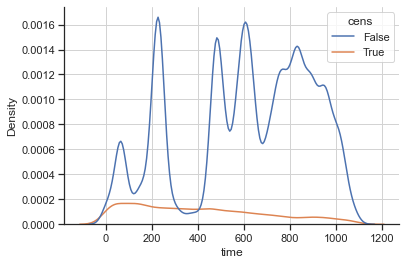

In [29]:
sns.kdeplot(pd.DataFrame(y1), x="time", hue="cens", bw_adjust=0.7)

<Axes: xlabel='time', ylabel='Density'>

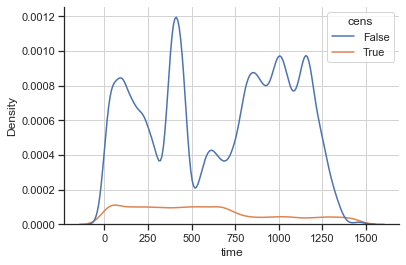

In [30]:
sns.kdeplot(pd.DataFrame(y2), x="time", hue="cens", bw_adjust=0.7)

<Axes: xlabel='time', ylabel='Density'>

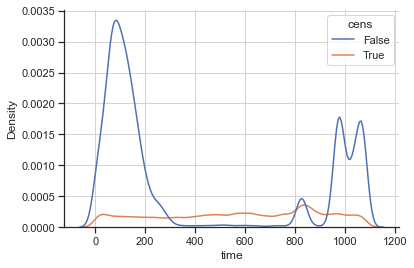

In [33]:
sns.kdeplot(pd.DataFrame(y3), x="time", hue="cens", bw_adjust=0.4)

In [23]:
# from datetime import datetime
# datetime.strptime("2021-12-31", "%Y-%m-%d") - datetime.strptime("2018-01-01", "%Y-%m-%d")

In [47]:
df = X.fillna(0).copy()
df["time"] = y["time"]
df["event"] = y["cens"]

In [51]:
import lifelines

#Fitting the model
WeibullAFT = lifelines.WeibullAFTFitter(penalizer=0.01).fit(df.fillna(0), duration_col = 'time',event_col = 'event')
#Assumption check
WeibullAFT.print_summary()

<lifelines.WeibullAFTFitter: fitted with 37625 total observations, 33392 right-censored observations>
             duration col = 'time'
                event col = 'event'
                penalizer = 0.01
   number of observations = 37625
number of events observed = 4233
           log-likelihood = -37063.08
         time fit was run = 2025-08-03 13:29:53 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                    
lambda_ capacity_bytes         0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
        model                 -0.01       0.99       0.00            -0.01            -0.00                 0.99                 1.00
        smart_10_normalized    0.01       1.01       0.00             0.00             0.01                 1.00                 1.01
        smart_10_raw           0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
        smart_11_normalized    0.00       1.00       0.00             0.00             0.01                 1.00                 1.01
        smart_11_raw          -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
        smart_12_normalized   -0.04       0.96       0.01            -0.05            -0.02                 0.95                 0.98
        smart_12_raw           0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
        smart_183_normalized   0.01       1.01       0.00             0.01             0.01                 1.01                 1.01
        smart_183_raw          0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
        smart_184_normalized   0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
        smart_184_raw         -0.06       0.94       0.05            -0.17             0.04                 0.84                 1.04
        smart_187_normalized   0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
        smart_187_raw         -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
        smart_188_normalized  -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
        smart_188_raw         -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
        smart_189_normalized  -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
        smart_189_raw         -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
        smart_190_normalized  -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
        smart_190_raw          0.01       1.01       0.00            -0.00             0.01                 1.00                 1.01
        smart_191_normalized  -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
        smart_191_raw          0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
        smart_192_normalized   0.01       1.01       0.00             0.00             0.01                 1.00                 1.01
        smart_192_raw         -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
        smart_193_normalized   0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
        smart_

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from lifelines.datasets import load_gbsg2
from lifelines import CoxPHFitter, WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter
from lifelines.statistics import proportional_hazard_test, logrank_test


In [53]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(df['time'], event_observed=df['event'])

typical_case = df.drop(columns=['time', 'event']).median().to_frame().T
timeline = np.linspace(1, df['time'].max(), 500)

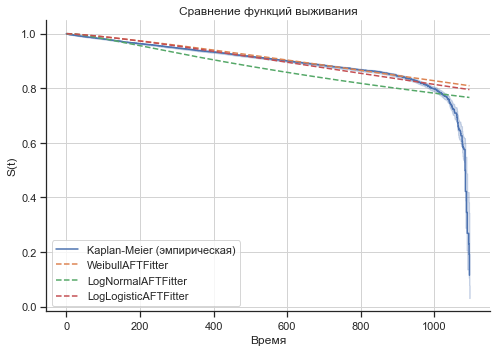

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
kmf.plot_survival_function(label='Kaplan-Meier (эмпирическая)', ci_show=True)
for M in [WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter]:
    model = M(penalizer=0.001)
    model.fit(df, duration_col='time', event_col='event')
    surv = model.predict_survival_function(typical_case, times=timeline)
    plt.plot(timeline, surv.T.values[0], label=f'{model.__class__.__name__}', linestyle='--')

plt.title("Сравнение функций выживания")
plt.xlabel("Время")
plt.ylabel("S(t)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()